<a href="https://colab.research.google.com/github/SatyaanikaPandam/Data-Science/blob/main/Saty_PandU7proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project examines how various factors influence the number of calories burned during exercise. The key predictors include age, weight, height, exercise duration, heart rate, and body temperature. Our goal is to determine which of these factors have the greatest impact on calorie burning.

In [3]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.2 MB/s eta 0:00:00


In [4]:
calories = pd.read_csv('https://raw.githubusercontent.com/SatyaanikaPandam/Data-Science/refs/heads/main/100%20calories%20data%20-%20Sheet1.csv')

In [5]:
calories

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,71,13,100,40.5,71
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
94,female,27,159,53,19,92,40.5,18
95,male,40,181,83,25,102,40.9,70
96,female,57,160,62,4,87,39.1,185
97,female,23,171,67,15,89,40.6,54


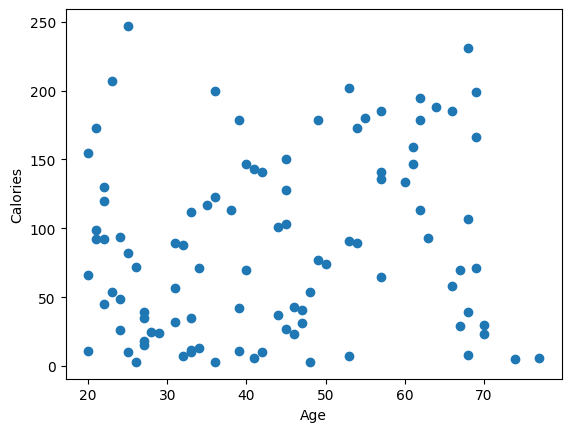

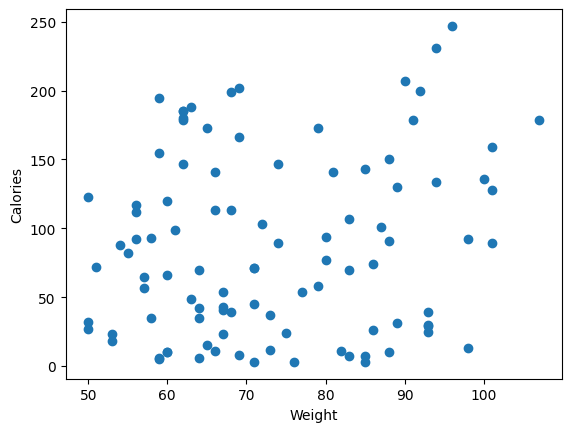

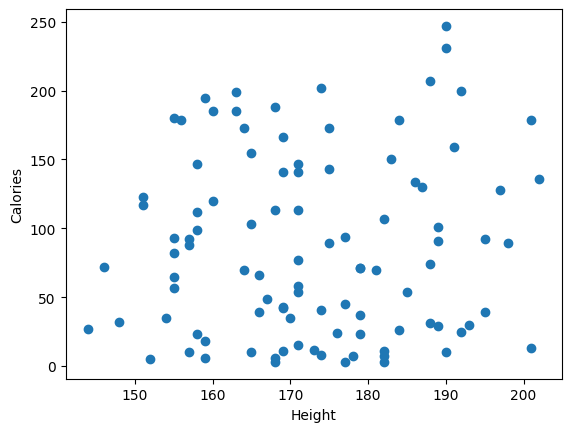

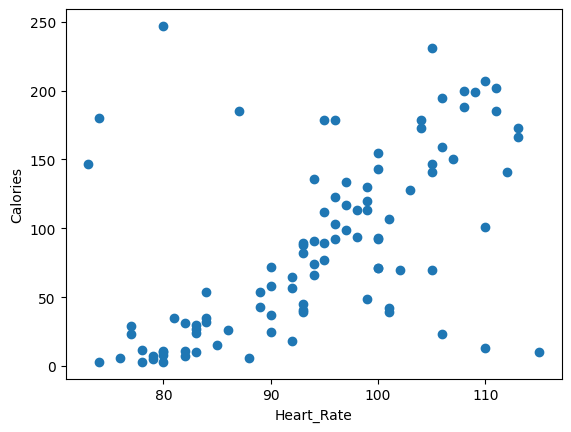

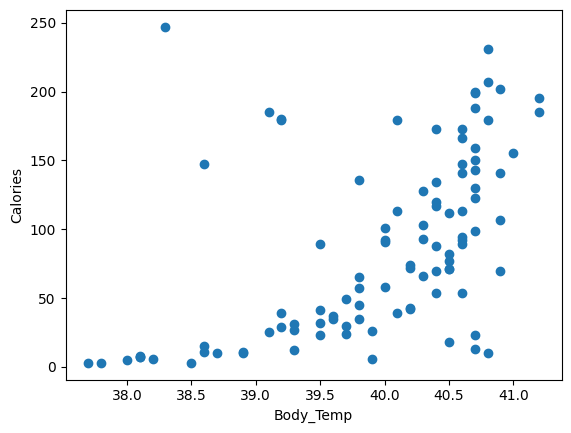

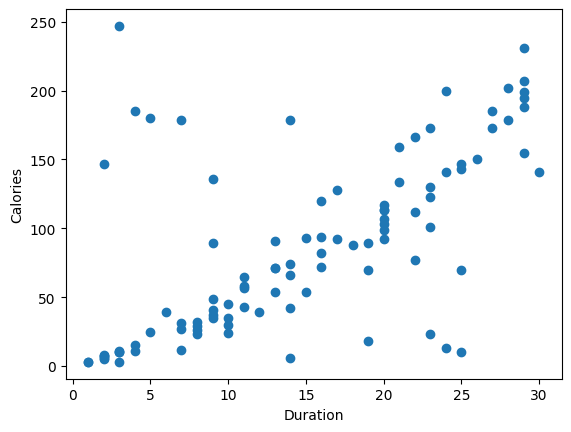

In [6]:
x = ["Age", "Weight", "Height", "Heart_Rate", "Body_Temp", "Duration"]
y = "Calories"
for a in x:
  plt.scatter(calories[a], calories[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

I began by creating individual dot plots for each predictor to identify any correlations or patterns. Age, weight, and height appear scattered without a clear trend, suggesting little to no relationship. In contrast, duration, heart rate, and body temperature show more structured patterns, indicating a stronger connection to calorie burning.

# Duration - Gaussian

I put the 3 factors (heart rate, body temp, and duration) through the graphs below to see if there are strong correlations and interactions.

In [7]:
#one degree model for bikes; this is the "best" model, up till now.
model_poly_1 = bmb.Model("Calories ~ Duration", calories, family="gaussian")
idata_poly_1 = model_poly_1.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


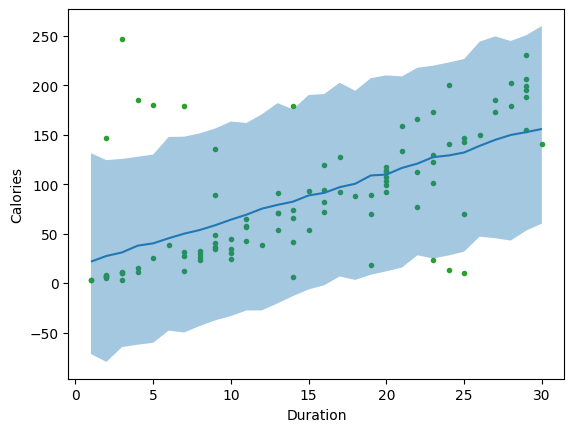

In [8]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "Duration", pps=True)
plt.plot(calories.Duration, calories.Calories, "C2.", zorder=-3)

# Hearth Rate - Gaussian

In [9]:
#one degree model for bikes; this is the "best" model, up till now.
model_poly_1 = bmb.Model("Calories ~ Heart_Rate", calories, family="gaussian")
idata_poly_1 = model_poly_1.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


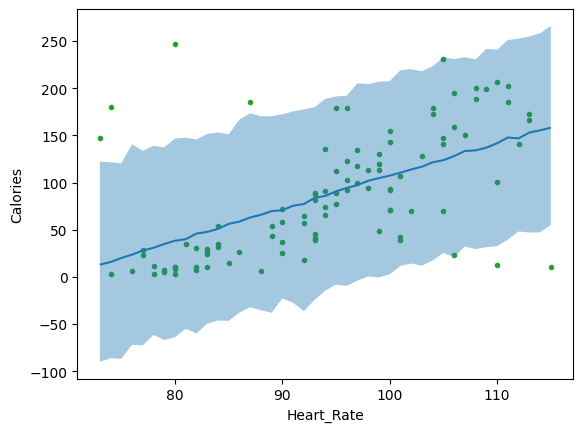

In [10]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "Heart_Rate", pps=True)
plt.plot(calories.Heart_Rate, calories.Calories, "C2.", zorder=-3)

# Body_Temp - Gaussian

In [11]:
#one degree model for bikes; this is the "best" model, up till now.
model_poly_1 = bmb.Model("Calories ~ Body_Temp", calories, family="gaussian")
idata_poly_1 = model_poly_1.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


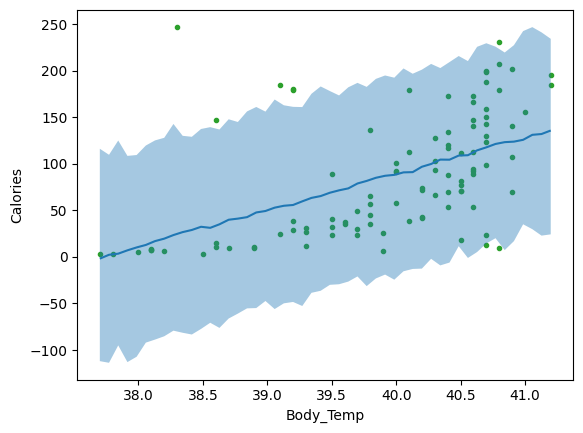

In [12]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "Body_Temp", pps=True)
plt.plot(calories.Body_Temp, calories.Calories, "C2.", zorder=-3)

# With all predictors and interactions

In [13]:
model_poly_1 = bmb.Model("Calories ~ Body_Temp + Heart_Rate + Duration + Age + Weight + Height: Heart_Rate + Age:Duration + Weight: Duration", calories, family="gaussian")
idata_poly_1 = model_poly_1.fit(idata_kwargs={"log_likelihood":True})

Output()

Body Temp

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


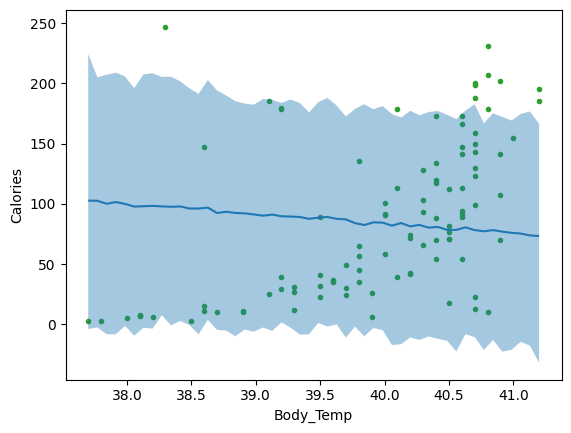

In [14]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, ["Body_Temp"], pps=True)
plt.plot(calories.Body_Temp, calories.Calories, "C2.", zorder=-3)

# Weight

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


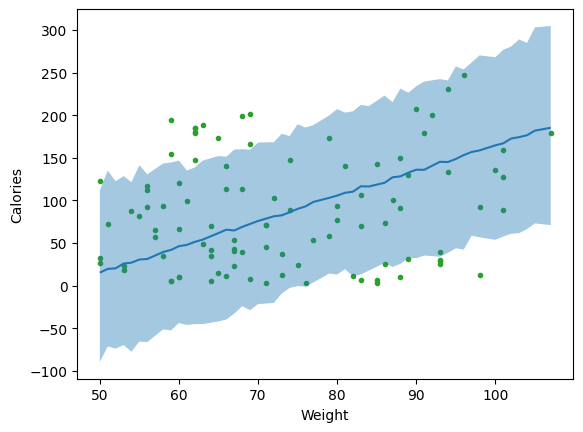

In [15]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, ["Weight"], pps=True)
plt.plot(calories.Weight, calories.Calories, "C2.", zorder=-3)

# Hearth Rate

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


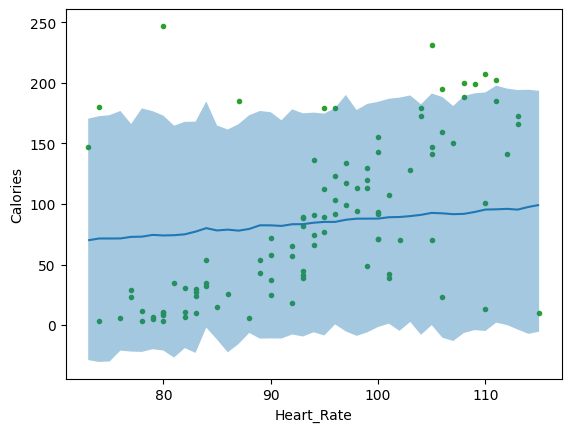

In [16]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, ["Heart_Rate"], pps=True)
plt.plot(calories.Heart_Rate, calories.Calories, "C2.", zorder=-3)

# Duration

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


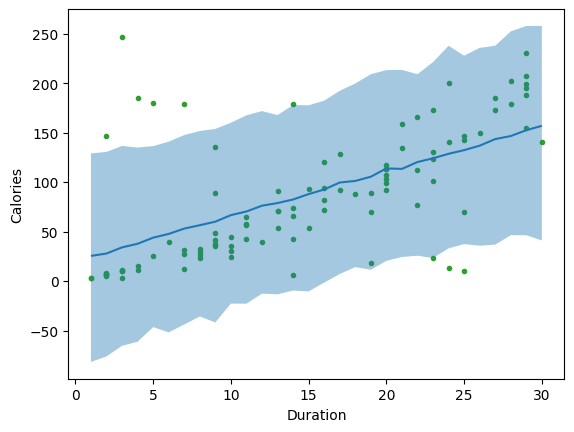

In [17]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, ["Duration"], pps=True)
plt.plot(calories.Duration, calories.Calories, "C2.", zorder=-3)

## No interactions

In [18]:
model_poly_2= bmb.Model("Calories ~ Body_Temp + Heart_Rate + Duration + Age + Weight + Height", calories, family="gaussian")
idata_poly_2 = model_poly_2.fit(idata_kwargs={"log_likelihood":True})


Output()

# Body Temp

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


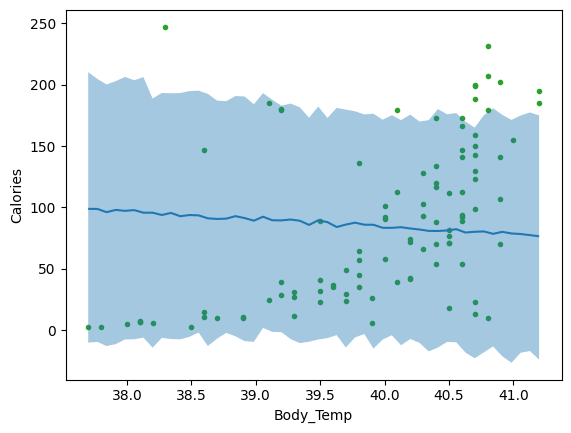

In [19]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, ["Body_Temp"], pps=True)
plt.plot(calories.Body_Temp, calories.Calories, "C2.", zorder=-3)

# Weight

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


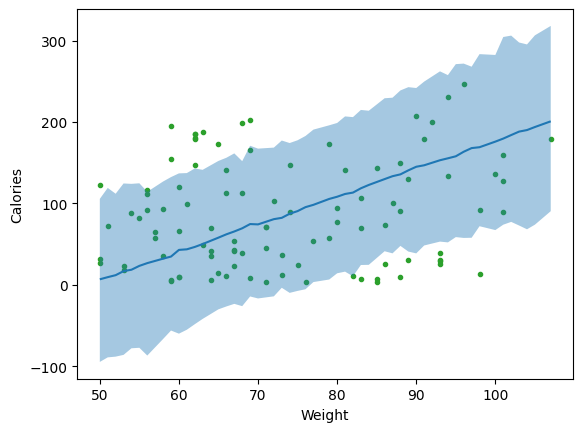

In [20]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, ["Weight"], pps=True)
plt.plot(calories.Weight, calories.Calories, "C2.", zorder=-3)

# Hearth Rate

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


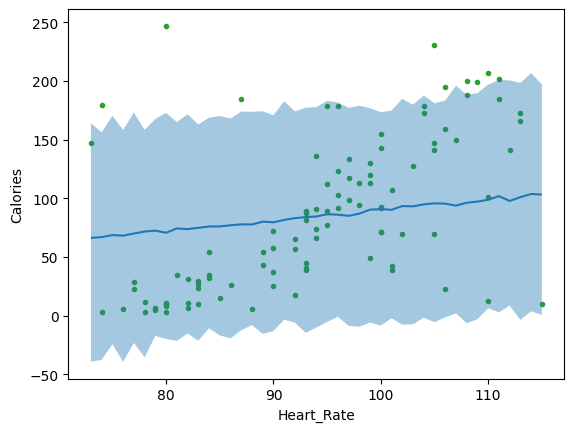

In [21]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, ["Heart_Rate"], pps=True)
plt.plot(calories.Heart_Rate, calories.Calories, "C2.", zorder=-3)

# Duration

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


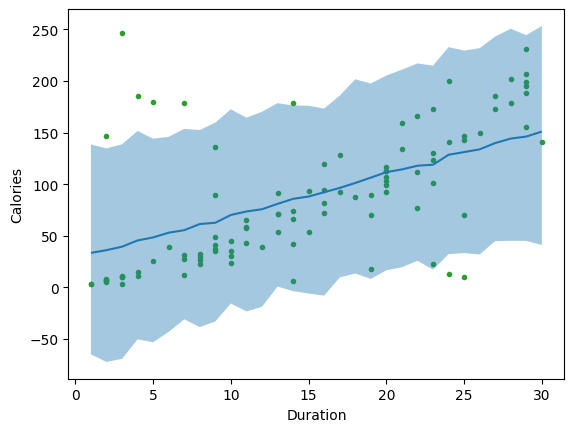

In [22]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, ["Duration"], pps=True)
plt.plot(calories.Duration, calories.Calories, "C2.", zorder=-3)

# Compare "All interactions" to "No interactions"

I compared the model with interactions and the model without interactions. And the model without interactions was better.

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

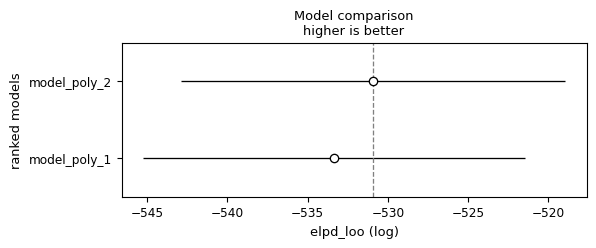

In [23]:
compare = az.compare({"model_poly_1":idata_poly_1, "model_poly_2":idata_poly_2})
az.plot_compare(compare)

In [24]:
model_poly_2= bmb.Model("Calories ~ Body_Temp + Heart_Rate + Duration + Age + Weight + Height", calories, family="gaussian")
idata_poly_2 = model_poly_2.fit(idata_kwargs={"log_likelihood":True})


Output()

# Graph 1

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


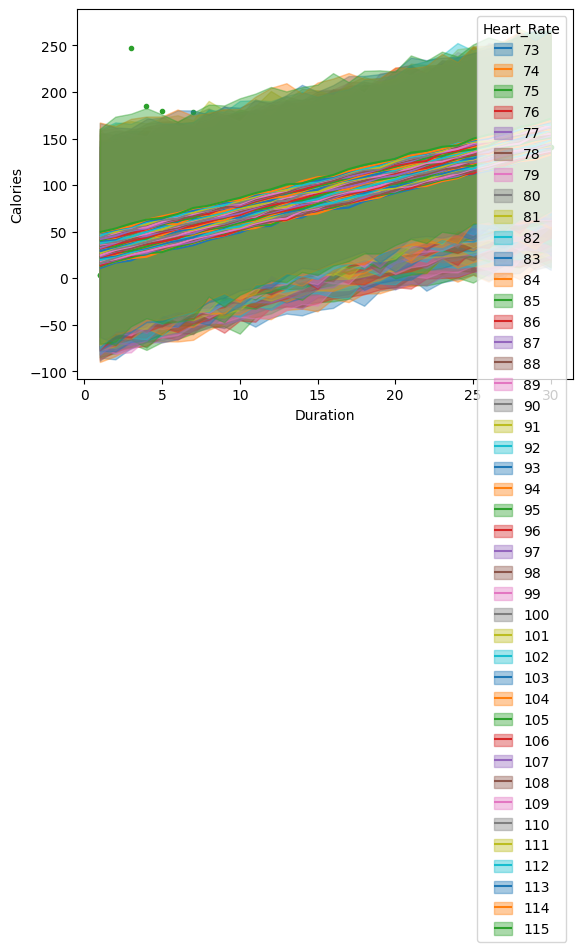

In [27]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, ["Duration","Heart_Rate"], pps=True) # Changed the string "Body_Temp, Hearth_Rate, Duration" to a list of strings ["Body_Temp", "Heart_Rate", "Duration"]
plt.plot(calories.Duration, calories.Calories, "C2.", zorder=-3)

# Graph 2

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


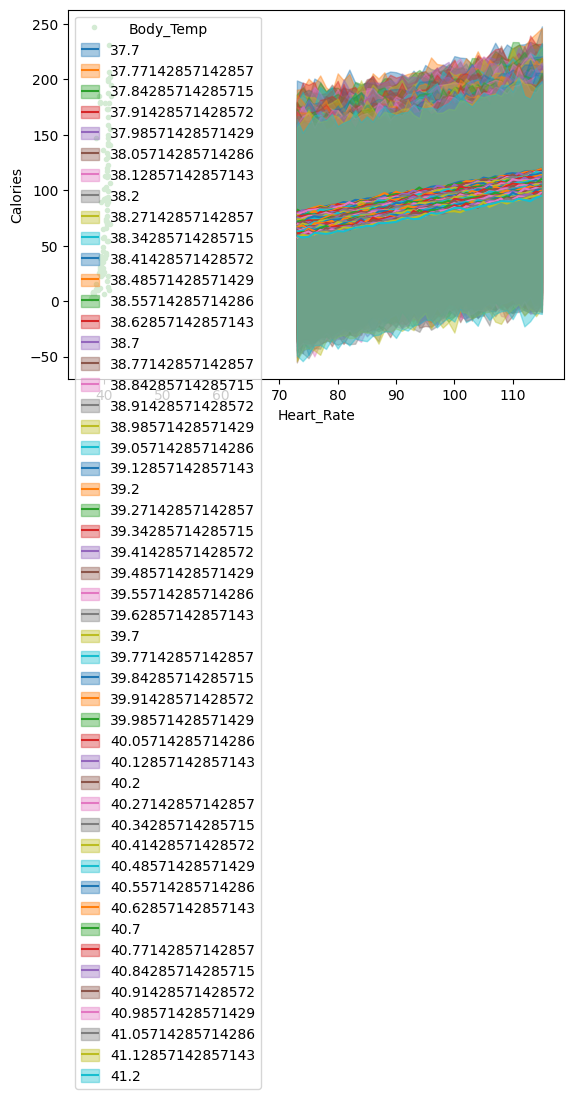

In [132]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, ["Heart_Rate", "Body_Temp"], pps=True) # Changed the string "Body_Temp, Hearth_Rate, Duration" to a list of strings ["Body_Temp", "Heart_Rate", "Duration"]
plt.plot(calories.Body_Temp, calories.Calories, "C2.", zorder=-3)

# Final Graph

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


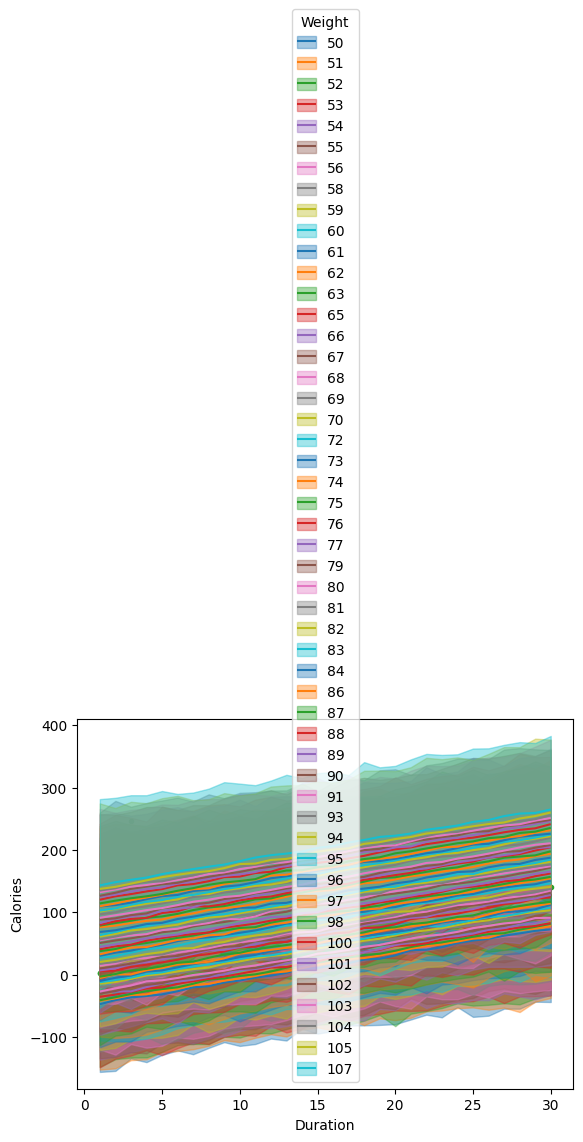

In [39]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, ["Duration", "Weight"], pps=True) # Changed the string "Body_Temp, Hearth_Rate, Duration" to a list of strings ["Body_Temp", "Heart_Rate", "Duration"]
plt.plot(calories.Duration, calories.Calories, "C2.", zorder=-3)

Graph 1 has a scattered set of data points, with a predicted line that follows the general shape of the data. The points are spread out, showing some variation in the relationship between Duration and Calories burned. While there is a visible upward trend, meaning that longer exercise duration generally leads to more calorie burn, not all points perfectly align with the line. Some data points are farther away, indicating individual differences such as fitness level or efficiency of miovement. This graph captures an expected relationship but the connection isn't strong. Graph 2 shows Body Temp on the x-axis, with scatttered data points and a line trying to capture the trend. However, the points don’t follow the line as closely as in the first graph, suggesting that Body Temperature may not be a strong predictor of Calories burned. This makes sense because temperature can fluctauate due to many factors unreilated to calorie burn, such as environment or hydration. Some points are far from the line, showing that Body temp alone is not a reliable way to estimate Calories burned. There is more variation here comipared to the first graph. The last graph is the most structured and visually convincing. The x-axis represents Duration, which is an obviious factor in calorie burn, while Weight is another major contributor. The data points in this graph are more aligned with the prediction line compared to the other graphs, meaning the model is better at explaining calorie expenditure with these two predictors. There are still some weird points, data that do not perfectly follow the line, but the trend is much clearer and stronger than in the other graphs. Since Weight and Duration both have direct physical connections to energy use, this graph provides the best prediction, making it the most reliable for understanding calorie burn patterns. For example, imagine two people: one carrying a heavy hiiking backpack and another with no extra weight. If they both hike for the same amount of time, the person carrying the heavy backpack will burn more calories because their body has to work harder to move the extra weight. Similarly, in this graph, people with higher body weight tend to have steeper slopes, meaning their calorie burn increases more rapidly with longer exercise durations. This explains why this graph is the most rieliable, it captures how both Weight and Duration influence calorie burn in a better way.
